In [37]:
import numpy as np
import matplotlib.pyplot as plt
import nilearn 
from nilearn import datasets
from nilearn import connectome
import nibabel as nib
from nilearn.maskers import NiftiMapsMasker
from nilearn.connectome import ConnectivityMeasure
from nilearn import plotting
import seaborn as sns
from tqdm.notebook import tqdm
import multinetx as mx

%matplotlib inline
sns.set()

In [38]:
# load autism supra-adjacency matrix
atlas = datasets.fetch_atlas_msdl()
atlas_filename = atlas["maps"]
labels = atlas["labels"]
num_ROIs = len(labels)

In [39]:
# extract the centrality measures of and normalize them to the range [0,1]
aggregated_autism_pagerank_scores = np.load("aggregated_autism_pagerank_scores.npy")
multiplex_tens_autism_pagerank_scores = np.load("multiplex_tens_autism_pagerank_scores.npy")

aggregated_control_pagerank_scores = np.load("aggregated_control_pagerank_scores.npy")
multiplex_tens_control_pagerank_scores = np.load("multiplex_tens_control_pagerank_scores.npy")

print(aggregated_autism_pagerank_scores.shape)
print(multiplex_tens_autism_pagerank_scores.shape)
print(aggregated_control_pagerank_scores.shape)
print(multiplex_tens_control_pagerank_scores.shape)

(29, 39)
(29, 39)
(28, 39)
(28, 39)


{'whiskers': [<matplotlib.lines.Line2D at 0x15ef07490>,
 'caps': [<matplotlib.lines.Line2D at 0x15e60b4d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x15ef054d0>,
 'medians': [<matplotlib.lines.Line2D at 0x15e60b0d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x15e60a050>,
 'means': []}

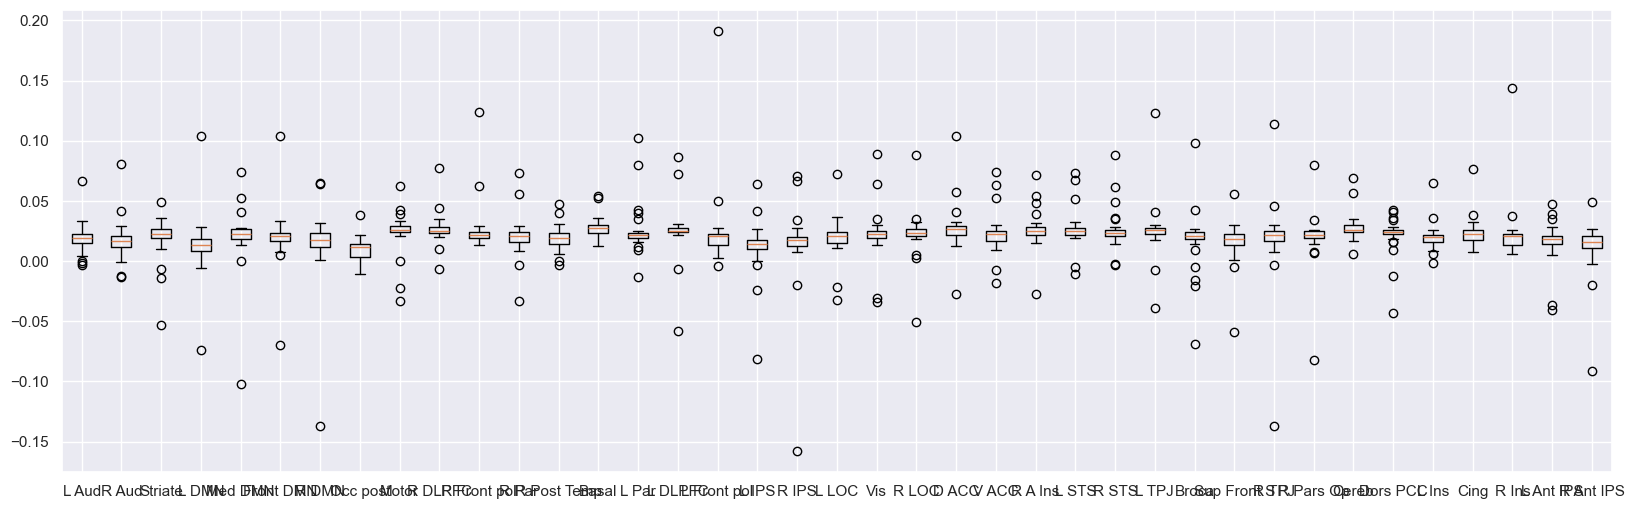

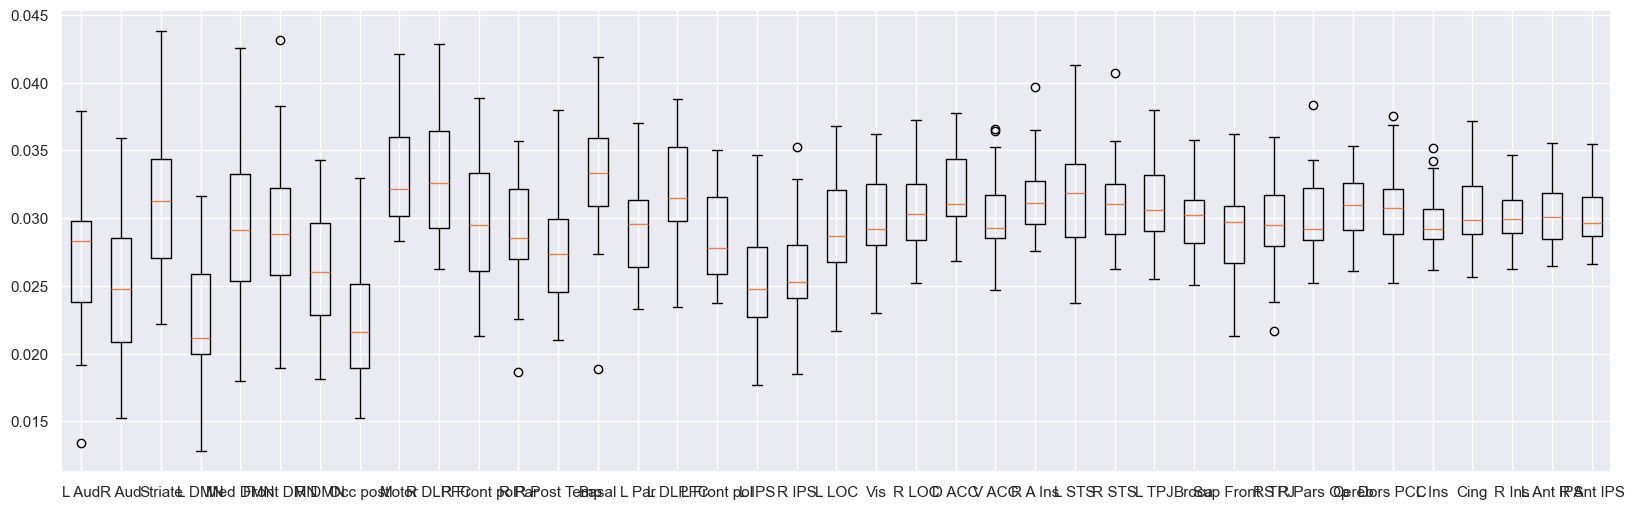

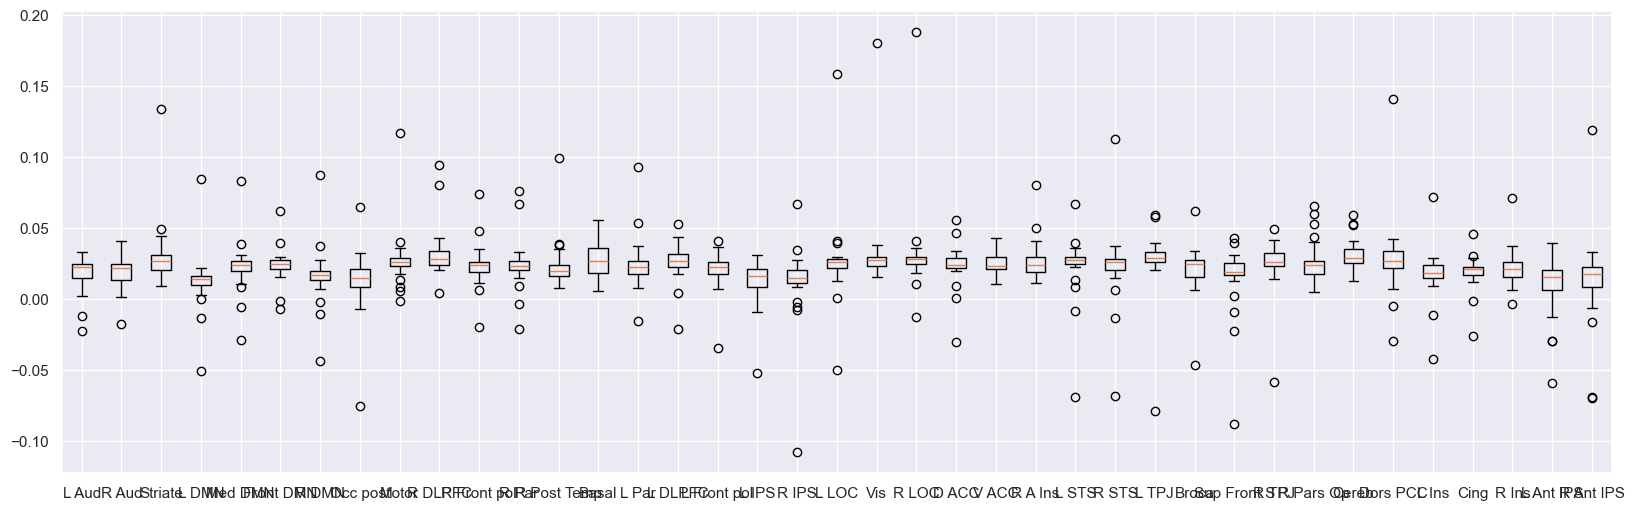

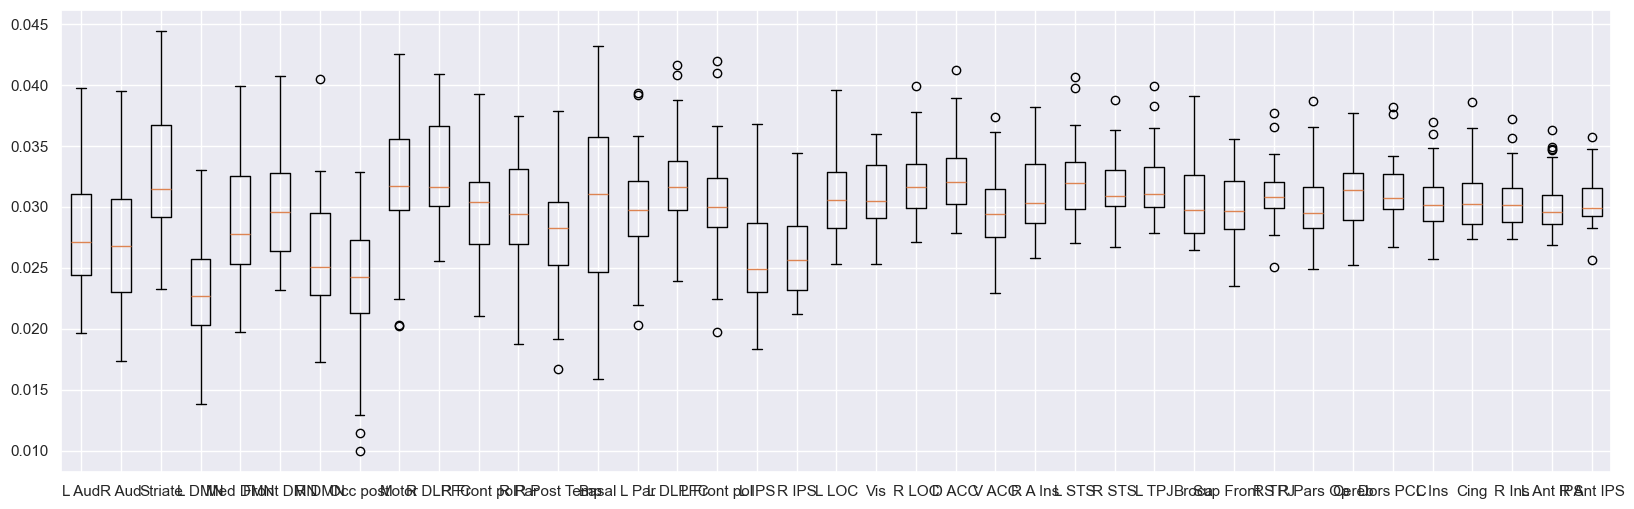

In [40]:
plt.figure(figsize=(20, 6))
plt.boxplot(aggregated_autism_pagerank_scores, labels=labels)

plt.figure(figsize=(20, 6))
plt.boxplot(multiplex_tens_autism_pagerank_scores, labels=labels)

plt.figure(figsize=(20, 6))
plt.boxplot(aggregated_control_pagerank_scores, labels=labels)

plt.figure(figsize=(20, 6))
plt.boxplot(multiplex_tens_control_pagerank_scores, labels=labels)


In [48]:
from scipy import stats
 
# calculate the p-value for each ROI
p_values = []
for i in range(num_ROIs):
    p_values.append(stats.ttest_ind(aggregated_autism_pagerank_scores[:,i], aggregated_control_pagerank_scores[:,i])[1])
p_values = np.array(p_values)
print(p_values)
# return index of 5 smallest p-value
min_pval = np.argsort(p_values)[:5]
print(np.sort(p_values)[:5])
for i in min_pval:
    print(labels[i])

# calculate the p-value for each ROI
p_values = []
for i in range(num_ROIs):
    p_values.append(stats.ttest_ind(multiplex_tens_autism_pagerank_scores[:,i], multiplex_tens_control_pagerank_scores[:,i])[1])
p_values = np.array(p_values)
print(p_values)
# return index of 5 smallest p-value
min_pval = np.argsort(p_values)[:5]
print(np.sort(p_values)[:5])
for i in min_pval:
    print(labels[i])

[0.66319956 0.73645926 0.05051626 0.87195689 0.67806781 0.40597192
 0.86252427 0.57050783 0.47054781 0.18204634 0.58361417 0.43816464
 0.24768686 0.93186706 0.78844888 0.90891282 0.54264248 0.95424966
 0.93480809 0.28561145 0.17130363 0.21290902 0.44134752 0.55036913
 0.93993509 0.57425727 0.64201145 0.74509828 0.5583817  0.7985275
 0.38089208 0.1731102  0.44437767 0.26932423 0.66743785 0.15239491
 0.8685744  0.16248579 0.85762511]
[0.05051626 0.15239491 0.16248579 0.17130363 0.1731102 ]
Striate
Cing
L Ant IPS
Vis
R Pars Op
[0.40596238 0.13978225 0.34654322 0.54388264 0.77526476 0.50539875
 0.76872059 0.35382193 0.30449045 0.871587   0.67148097 0.51987366
 0.75313987 0.08248257 0.59603856 0.91301094 0.11015947 0.79674871
 0.85993146 0.04122281 0.17813436 0.08517522 0.50840722 0.62142761
 0.52836397 0.37841753 0.36920242 0.17935777 0.33766992 0.39158008
 0.04033991 0.80089435 0.89886436 0.55132375 0.20006635 0.99652727
 0.53692508 0.99003227 0.48416668]
[0.04033991 0.04122281 0.08248257

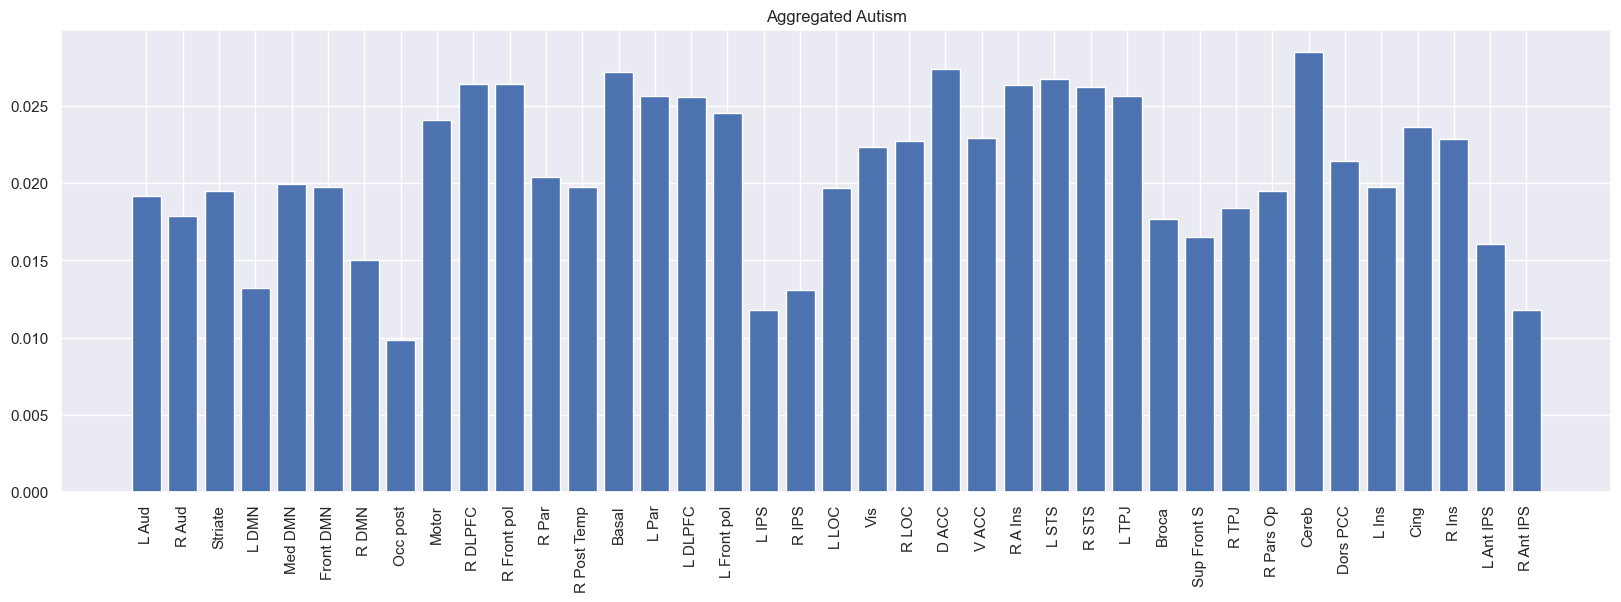

In [49]:
# computing the mean over each ROI
aggregated_autism_pagerank_scores_mean = np.mean(aggregated_autism_pagerank_scores, axis=0)
multiplex_tens_autism_pagerank_scores_mean = np.mean(multiplex_tens_autism_pagerank_scores, axis=0)
aggregated_control_pagerank_scores_mean = np.mean(aggregated_control_pagerank_scores, axis=0)
multiplex_tens_control_pagerank_scores_mean = np.mean(multiplex_tens_control_pagerank_scores, axis=0)

# plot the mean of each ROI
plt.figure(figsize=(20, 6))
plt.bar(labels, aggregated_autism_pagerank_scores_mean)
plt.xticks(rotation=90)
plt.title("Aggregated Autism")
plt.show()

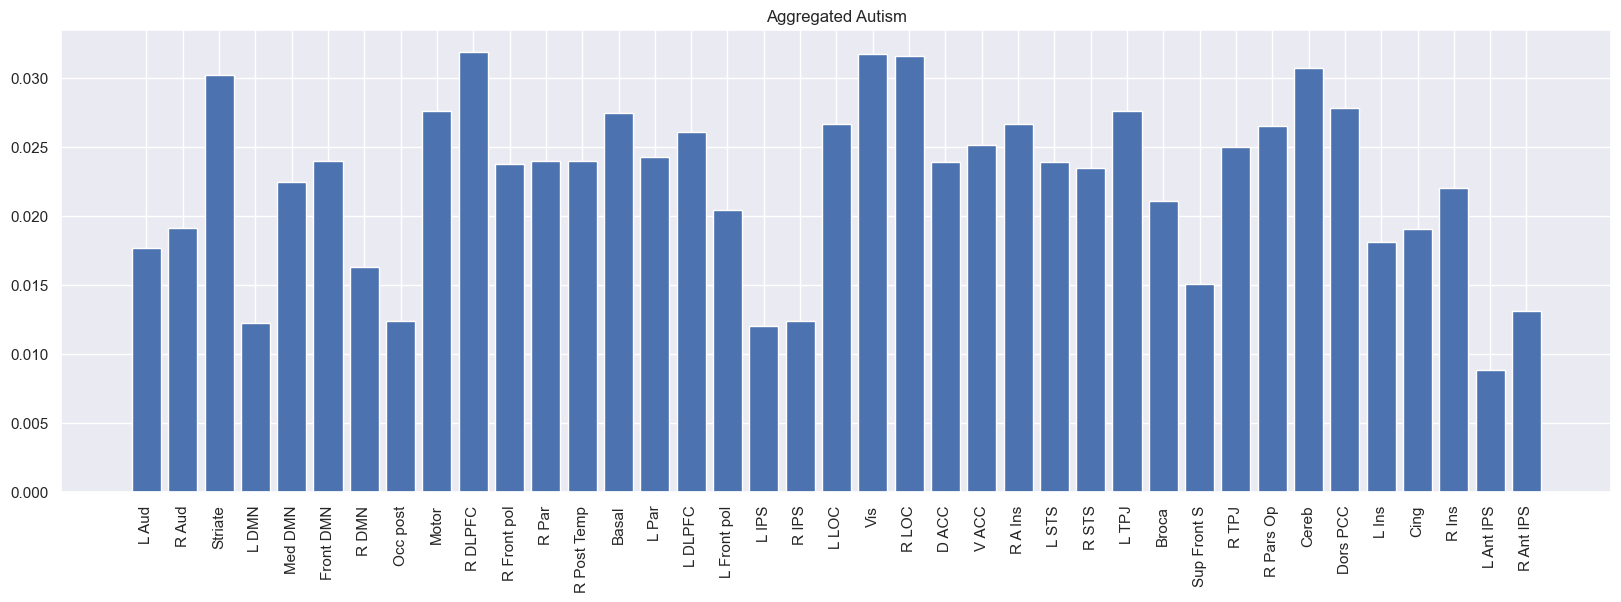

In [50]:
# plot the mean of each ROI
plt.figure(figsize=(20, 6))
plt.bar(labels, aggregated_control_pagerank_scores_mean)
plt.xticks(rotation=90)
plt.title("Aggregated Autism")
plt.show()

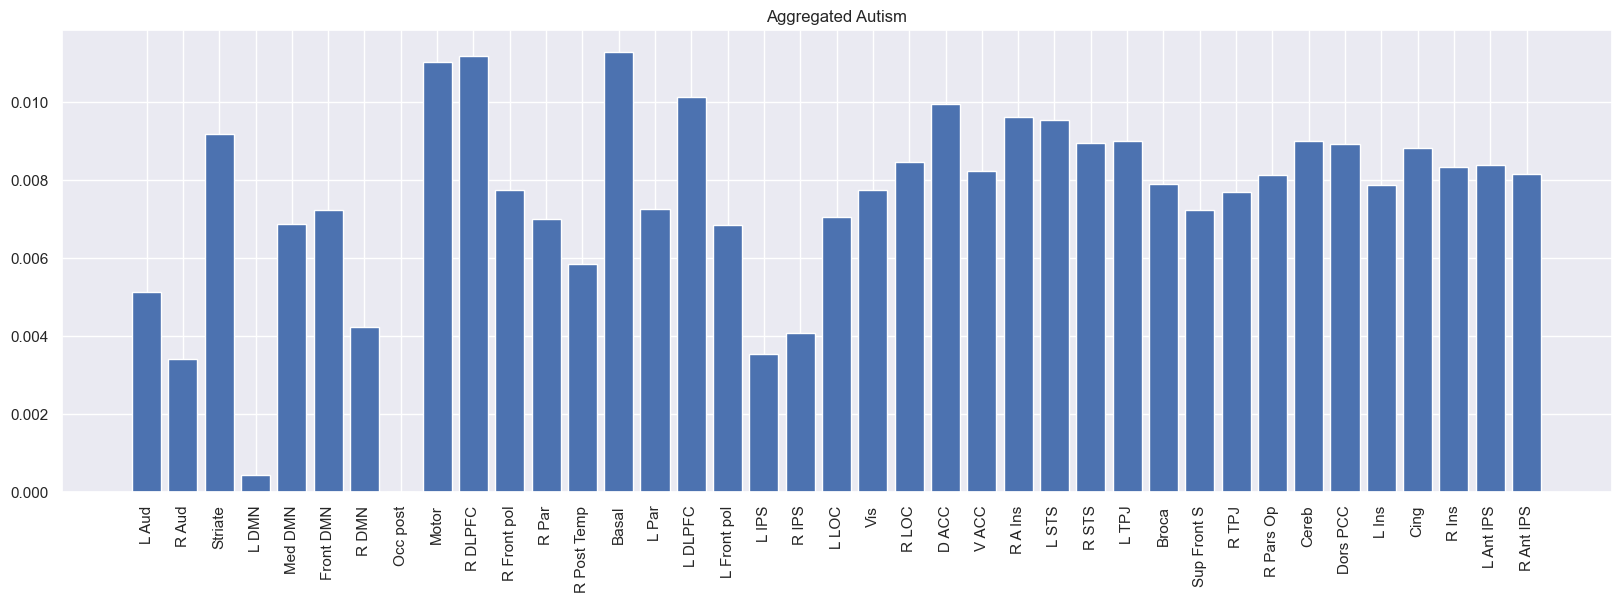

In [54]:
# sutraction of the minimum value
multiplex_tens_autism_pagerank_scores_mean = multiplex_tens_autism_pagerank_scores_mean - np.min(multiplex_tens_autism_pagerank_scores_mean)
# plot the mean of each ROI
plt.figure(figsize=(20, 6))
plt.bar(labels, multiplex_tens_autism_pagerank_scores_mean)
plt.xticks(rotation=90)
plt.title("Aggregated Autism")
plt.show()

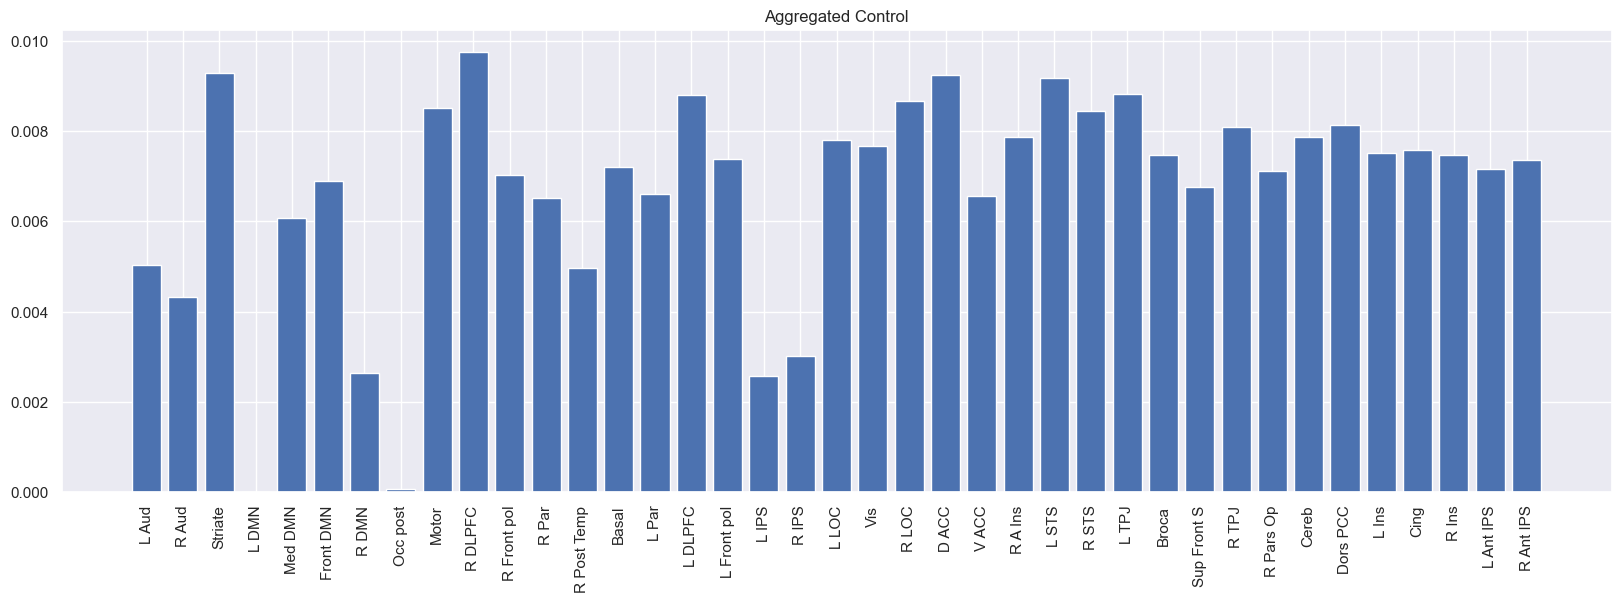

In [56]:
# sutraction of the minimum value
multiplex_tens_control_pagerank_scores_mean = multiplex_tens_control_pagerank_scores_mean - np.min(multiplex_tens_control_pagerank_scores_mean)

#plot the mean of each ROI
plt.figure(figsize=(20, 6))
plt.bar(labels, multiplex_tens_control_pagerank_scores_mean)
plt.xticks(rotation=90)
plt.title("Aggregated Control")
plt.show()

In [ ]:
from scipy import stats

# Example data (replace with your actual data)
before_treatment = [25, 28, 30, 32, 22]
after_treatment = [21, 26, 29, 30, 20]

# Perform a paired t-test
t_statistic, p_value = stats.ttest_rel(before_treatment, after_treatment)

# Display the results
print("Paired t-test results:")
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")
